In [2]:
##### python imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sn
from sklearn import linear_model

In [3]:
def histogram(x, i, legend, xlabel, ylabel, colors):    
    axs.hist(x, color=colors, label=legend, alpha=0.5, edgecolor="black")
    axs.set_xlabel(xlabel, size=12)
    axs.set_ylabel(ylabel, size=12)
    axs.axvline(x.mean(), color=colors, linewidth=1, linestyle='dashed')
    axs.legend(frameon=False)

    
def scatter_plot(x, y, i, xlabel, ylabel, colors):    
    axs[i].scatter(x, y, color=colors, s=5)
    axs[i].set_xlabel(xlabel, size=12)
    axs[i].set_ylabel(ylabel, size=12)
    

def correlation_matrix(df, title):       
    sn.heatmap(corrMatrix_all, cmap="YlGnBu", annot=True)
    ax.set_title(title, size=14)
    plt.tight_layout()    
    return plt.show()


def t_test(x, y, alpha):
    t_statistic, pvalue = stats.ttest_ind(x, y, equal_var=False) ### Welch’s t-test, two-sided    
    if pvalue < alpha:
        evaluate = 'significantly different'
    else:
        evaluate = 'not significant'    
    return f't-statistic: {"{:.4f}".format(t_statistic)}, p-value: {"{:.2e}".format(pvalue)}, {evaluate}'
    

def one_way_anova(alpha, *args):    
    stat, pvalue = stats.f_oneway(*args)   
    if pvalue < alpha:
        evaluate = 'significantly different'
    else:
        evaluate = 'not significant'        
    return f'ANOVA: statistic = {"{:.4f}".format(stat)}, p-value = {"{:.2e}".format(pvalue)}, {evaluate}'


def linear_regression(X, y):    
    exp = linear_model.LinearRegression()
    model = exp.fit(X, y)
    response = model.predict(X)
    r2 = model.score(X, y)    
    return r2, model.coef_, model.intercept_, response

In [4]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
pd.notnull(insurance).count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [7]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


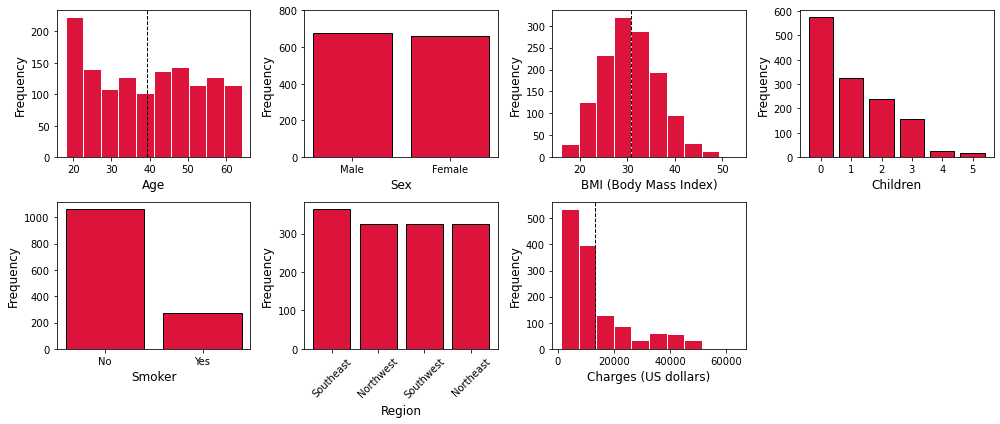

age: mean: 39
number of male: 676
number of female: 662
bmi: mean: 30.7
number of nonsmoker: 1064
number of smoker: 274
charge: max: 63770
charge: min: 1122
charge: mean: 13270


In [53]:
##### plots each categories of the dataset  
fig, axs = plt.subplots(2,4,figsize=(14,6))

### age
axs[0,0].hist(insurance['age'], color='crimson', edgecolor="white")
#axs[0,0].set_title('Age')
axs[0,0].set_xlabel('Age', size=12)
axs[0,0].set_ylabel('Frequency', size=12)
axs[0,0].axvline(insurance['age'].mean(), color='black', linewidth=1, linestyle='dashed')

### sex
sx = insurance['sex'].value_counts()
x = np.arange(len(sx))
bars = ['Male','Female']
axs[0,1].bar(x, sx, color='crimson', edgecolor="black")
#axs[0,1].set_title('Sex')
axs[0,1].set_xlabel('Sex', size=12)
axs[0,1].set_ylabel('Frequency', size=12)
axs[0,1].set_xticks(x)
axs[0,1].set_xticklabels(bars)
axs[0,1].set_ylim(0, 800)

### BMI
axs[0,2].hist(insurance['bmi'], color='crimson', edgecolor="white")
#axs[0,2].set_title('BMI')
axs[0,2].set_xlabel('BMI (Body Mass Index)', size=12)
axs[0,2].set_ylabel('Frequency', size=12)
axs[0,2].axvline(insurance['bmi'].mean(), color='black', linewidth=1, linestyle='dashed')

### children
child = insurance['children'].value_counts()
xc = np.arange(len(child))
barsc = np.array(np.arange(6))
axs[0,3].bar(xc, child, color='crimson', edgecolor="black")
#axs[0,3].set_title('Children')
axs[0,3].set_xlabel('Children', size=12)
axs[0,3].set_ylabel('Frequency', size=12)
axs[0,3].set_xticks(xc)
axs[0,3].set_xticklabels(barsc)

### smoker
smoker = insurance['smoker'].value_counts()
xsm = np.arange(len(smoker))
barssm = ['No','Yes']
axs[1,0].bar(xsm, smoker, color='crimson', edgecolor="black")
#axs[1,0].set_title('Smoker')
axs[1,0].set_xlabel('Smoker', size=12)
axs[1,0].set_ylabel('Frequency', size=12)
axs[1,0].set_xticks(xsm)
axs[1,0].set_xticklabels(barssm)

### region
region = insurance['region'].value_counts()
xr = np.arange(len(region))
barsr = ['Southeast','Northwest', 'Southwest', 'Northeast']
axs[1,1].bar(np.array(np.arange(4)), region, color='crimson', edgecolor="black")
#axs[1,1].set_title('Region')
axs[1,1].set_xlabel('Region', size=12)
axs[1,1].set_ylabel('Frequency', size=12)
axs[1,1].set_xticks(xr)
axs[1,1].set_xticklabels(barsr, rotation=45)

### charges
axs[1,2].hist(insurance['charges'], color='crimson', edgecolor="white")
#axs[1,2].set_title('Charges')
axs[1,2].set_xlabel('Charges (US dollars)', size=12)
axs[1,2].set_ylabel('Frequency', size=12)
axs[1,2].axvline(insurance['charges'].mean(), color='black', linewidth=1, linestyle='dashed')

fig.delaxes(ax= axs[1,3]) # delete empty plot.

plt.tight_layout()
plt.show()
#fig.savefig('overallgraphs.png')

print('age: mean:',"{:.0f}".format(insurance['age'].mean()))   
print('number of male:',insurance['sex'].value_counts()[0])
print('number of female:',insurance['sex'].value_counts()[1])
print('bmi: mean:',"{:.1f}".format(insurance['bmi'].mean()))
print('number of nonsmoker:',insurance['smoker'].value_counts()[0])
print('number of smoker:',insurance['smoker'].value_counts()[1])
print('charge: max:',"{:.0f}".format(max(insurance['charges'])))
print('charge: min:',"{:.0f}".format(min(insurance['charges'])))
print('charge: mean:',"{:.0f}".format(insurance['charges'].mean()))

In [9]:
##### transform data
insurance_t = insurance.copy()
insurance_t['smoker'] = insurance_t['smoker'].apply(lambda x: 0 if x=='no' else 1)
insurance_t['sex'] = insurance_t['sex'].apply(lambda x: 0 if x=='male' else 1)
insurance_t['region'] = insurance_t['region'].apply(lambda x: 0 if x=='northeast' else x)
insurance_t['region'] = insurance_t['region'].apply(lambda x: 1 if x=='southeast' else x)
insurance_t['region'] = insurance_t['region'].apply(lambda x: 2 if x=='northwest' else x)
insurance_t['region'] = insurance_t['region'].apply(lambda x: 3 if x=='southwest' else x)

In [10]:
##### trasform and select data
insurance_t2 = insurance.copy()
insurance_t2['smoker'] = insurance_t2['smoker'].apply(lambda x: 0 if x=='no' else 1)
#insurance_t2['sex'] = insurance_t2['sex'].apply(lambda x: 0 if x=='male' else 1)
insurance_t2['region'] = insurance_t2['region'].apply(lambda x: 0 if x=='northeast' else x)
insurance_t2['region'] = insurance_t2['region'].apply(lambda x: 1 if x=='southeast' else x)
insurance_t2['region'] = insurance_t2['region'].apply(lambda x: 2 if x=='northwest' else x)
insurance_t2['region'] = insurance_t2['region'].apply(lambda x: 3 if x=='southwest' else x)

male = insurance_t2[insurance_t2['sex'] == 'male'].reset_index()
female = insurance_t2[insurance_t2['sex'] == 'female'].reset_index()
print(f'sample size: male: {len(male)}, female: {len(female)}')

sample size: male: 676, female: 662


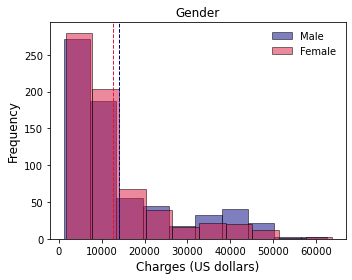

male: mean: 13957 , female: mean: 12570
t-statistic: 2.1009, p-value: 3.58e-02, significantly different


In [11]:
##### hypothesis Ttsting #####
##### male and female
insureplot = insurance.copy()
maleplot = insureplot[insureplot['sex'] == 'male'].reset_index()
femaleplot = insureplot[insureplot['sex'] == 'female'].reset_index()

color1='navy'
color2='crimson'
fig, axs = plt.subplots(figsize=(5,4))

### charges
axs.hist(maleplot['charges'], color=color1, label='Male', alpha=0.5, edgecolor="black")
axs.hist(femaleplot['charges'], color=color2, label='Female', alpha=0.5, edgecolor="black")
axs.set_title('Gender')
axs.set_xlabel('Charges (US dollars)', size=12)
axs.set_ylabel('Frequency', size=12)
axs.axvline(maleplot['charges'].mean(), color=color1, linewidth=1, linestyle='dashed')
axs.axvline(femaleplot['charges'].mean(), color=color2, linewidth=1, linestyle='dashed')
axs.legend(frameon=False)

plt.tight_layout()
plt.show()
#fig.savefig('gender.png')

print("male: mean:", "{:.0f}".format(maleplot['charges'].mean()), ",", "female: mean:", "{:.0f}".format(femaleplot['charges'].mean()))

##### statistics, p-value
col = ['charges']
for column in col:
    print(t_test(male[column].values, female[column].values, 0.05))

In [12]:
##### trasform and select data
insurance_t3 = insurance.copy()
#insurance_t3['smoker'] = insurance_t2['smoker'].apply(lambda x: 0 if x=='no' else 1)
insurance_t3['sex'] = insurance_t3['sex'].apply(lambda x: 0 if x=='male' else 1)
insurance_t3['region'] = insurance_t3['region'].apply(lambda x: 0 if x=='northeast' else x)
insurance_t3['region'] = insurance_t3['region'].apply(lambda x: 1 if x=='southeast' else x)
insurance_t3['region'] = insurance_t3['region'].apply(lambda x: 2 if x=='northwest' else x)
insurance_t3['region'] = insurance_t3['region'].apply(lambda x: 3 if x=='southwest' else x)

nonsmoker = insurance_t3[insurance_t3['smoker'] == 'no'].reset_index()
smoker = insurance_t3[insurance_t3['smoker'] == 'yes'].reset_index()

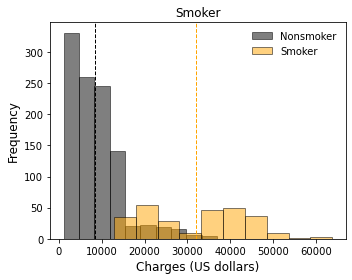

nonsmoker: mean: 8434 , smoker: mean: 32050
t-statistic: -32.7519, p-value: 5.89e-103, significantly different


In [13]:
##### nonsmoker and smoker
nonsmokerplot = insureplot[insureplot['smoker'] == 'no'].reset_index()
smokerplot = insureplot[insureplot['smoker'] == 'yes'].reset_index()

color1='black'
color2='orange'
fig, axs = plt.subplots(figsize=(5,4))

### charges
axs.hist(nonsmokerplot['charges'], color=color1, label='Nonsmoker', alpha=0.5, edgecolor="black")
axs.hist(smokerplot['charges'], color=color2, label='Smoker', alpha=0.5, edgecolor="black")
axs.set_title('Smoker')
axs.set_xlabel('Charges (US dollars)', size=12)
axs.set_ylabel('Frequency', size=12)
axs.axvline(nonsmokerplot['charges'].mean(), color=color1, linewidth=1, linestyle='dashed')
axs.axvline(smokerplot['charges'].mean(), color=color2, linewidth=1, linestyle='dashed')
axs.legend(frameon=False)

plt.tight_layout()
plt.show()
#fig.savefig('smoker.png')

print("nonsmoker: mean:", "{:.0f}".format(nonsmokerplot['charges'].mean()), ",", "smoker: mean:", "{:.0f}".format(smokerplot['charges'].mean()))

##### statistics, p-value
col = ['charges']
for column in col:
    print(t_test(nonsmoker[column].values, smoker[column].values, 0.05))

In [14]:
##### trasform and select data
insurance_t4 = insurance.copy()
insurance_t4['smoker'] = insurance_t4['smoker'].apply(lambda x: 0 if x=='no' else 1)
insurance_t4['sex'] = insurance_t4['sex'].apply(lambda x: 0 if x=='male' else 1)
insurance_t4['region'] = insurance_t4['region'].apply(lambda x: 0 if x=='northeast' else x)
insurance_t4['region'] = insurance_t4['region'].apply(lambda x: 1 if x=='southeast' else x)
insurance_t4['region'] = insurance_t4['region'].apply(lambda x: 2 if x=='northwest' else x)
insurance_t4['region'] = insurance_t4['region'].apply(lambda x: 3 if x=='southwest' else x)

In [15]:
##### BMI (Body Mass Index)
bins = [10, 20, 30, 40, 50, 60]
insurance_t4['binned'] = pd.cut(insurance_t4['bmi'], bins)
insurance_t4['bin_number'] = pd.cut(insurance_t4['bmi'], bins, labels=range(5))
b0 = insurance_t4[insurance_t4['bin_number'] == 0]
b1 = insurance_t4[insurance_t4['bin_number'] == 1]
b2 = insurance_t4[insurance_t4['bin_number'] == 2]
b3 = insurance_t4[insurance_t4['bin_number'] == 3]
b4 = insurance_t4[insurance_t4['bin_number'] == 4]
print(f'sample size: (10,20]: {len(b0)}, (20,30]: {len(b1)}, (30,40]: {len(b2)}, (40,50]: {len(b3)}, (50,60]: {len(b4)}')

sample size: (10,20]: 41, (20,30]: 592, (30,40]: 614, (40,50]: 88, (50,60]: 3


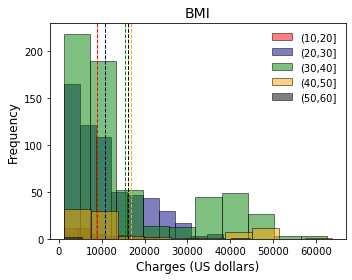

(10,20]: mean: 8839 , (20,30]: mean: 10850 , (30,40]: mean: 15380 , (40,50]: mean: 16810 , (50,60]: mean: 16034
ANOVA: statistic = 14.4182, p-value = 1.57e-11, significantly different


In [16]:
##### BMI groups
dataframe = [b0, b1, b2, b3, b4]
colors = ['red', 'navy', 'green', 'orange', 'black']
legend = ['(10,20]', '(20,30]', '(30,40]', '(40,50]', '(50,60]']

fig, axs = plt.subplots(figsize=(5,4))

### charges
for i in range(5):
    histogram(dataframe[i]['charges'], 1, legend[i], 'Charges (US dollars)', 'Frequency', colors[i])
axs.set_title('BMI', size=14)
    
plt.tight_layout()
plt.show()
#fig.savefig('bmi.png')

print("(10,20]: mean:", "{:.0f}".format(dataframe[0]['charges'].mean()), ",", "(20,30]: mean:", "{:.0f}".format(dataframe[1]['charges'].mean()), ",", "(30,40]: mean:", "{:.0f}".format(dataframe[2]['charges'].mean()), ",", "(40,50]: mean:", "{:.0f}".format(dataframe[3]['charges'].mean()), ",", "(50,60]: mean:", "{:.0f}".format(dataframe[4]['charges'].mean()))

##### ANOVA
col = ['charges']
for column in col:
    print(one_way_anova(0.05, b0[column], b1[column], b2[column], b3[column], b4[column]))

In [17]:
##### age
bins = [20, 30, 40, 50, 60, 70]
insurance_t4['binned'] = pd.cut(insurance_t4['age'], bins)
insurance_t4['bin_number'] = pd.cut(insurance_t4['age'], bins, labels=range(5))
a0 = insurance_t4[insurance_t4['bin_number'] == 0]
a1 = insurance_t4[insurance_t4['bin_number'] == 1]
a2 = insurance_t4[insurance_t4['bin_number'] == 2]
a3 = insurance_t4[insurance_t4['bin_number'] == 3]
a4 = insurance_t4[insurance_t4['bin_number'] == 4]
print(f'sample size: (20,30]: {len(a0)}, (30,40]: {len(a1)}, (40,50]: {len(a2)}, (50,60]: {len(a3)}, (60,70]: {len(a4)}')

sample size: (20,30]: 278, (30,40]: 257, (40,50]: 281, (50,60]: 265, (60,70]: 91


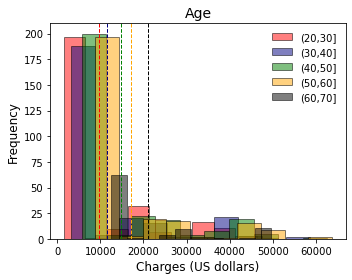

(20,30]: mean: 9806 , (30,40]: mean: 11639 , (40,50]: mean: 14782 , (40,50]: mean: 17062 , (50,60]: mean: 21063
ANOVA: statistic = 25.1454, p-value = 5.30e-20, significantly different


In [18]:
##### age
dataframe = [a0, a1, a2, a3, a4]
colors = ['red', 'navy', 'green', 'orange', 'black']
legend = ['(20,30]', '(30,40]', '(40,50]', '(50,60]', '(60,70]']

fig, axs = plt.subplots(figsize=(5,4))

### charges
for i in range(5):
    histogram(dataframe[i]['charges'], 1, legend[i], 'Charges (US dollars)', 'Frequency', colors[i])
axs.set_title('Age', size=14)
    
plt.tight_layout()
plt.show()
#fig.savefig('age.png')

print("(20,30]: mean:", "{:.0f}".format(dataframe[0]['charges'].mean()), ",", "(30,40]: mean:", "{:.0f}".format(dataframe[1]['charges'].mean()), ",", "(40,50]: mean:", "{:.0f}".format(dataframe[2]['charges'].mean()), ",", "(40,50]: mean:", "{:.0f}".format(dataframe[3]['charges'].mean()), ",", "(50,60]: mean:", "{:.0f}".format(dataframe[4]['charges'].mean()))

##### ANOVA
col = ['charges']
for column in col:
    print(one_way_anova(0.05, a0[column], a1[column], a2[column], a3[column], a4[column]))

In [19]:
##### children
zero = insurance_t4[insurance_t4['children'] == 0]
one = insurance_t4[insurance_t4['children'] == 1]
two = insurance_t4[insurance_t4['children'] == 2]
three = insurance_t4[insurance_t4['children'] == 3]
four = insurance_t4[insurance_t4['children'] == 4]
five = insurance_t4[insurance_t4['children'] == 5]
print(f'sample size: zero: {len(zero)}, one: {len(one)}, two: {len(two)}, three: {len(three)}, four: {len(four)}, five: {len(five)}')

sample size: zero: 574, one: 324, two: 240, three: 157, four: 25, five: 18


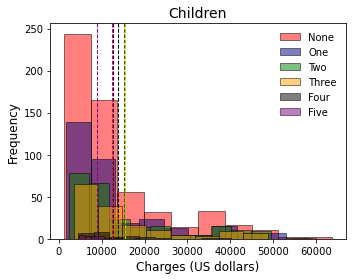

none: mean: 12366 , one: mean: 12731 , two: mean: 15074 , three: mean: 15355 , four: mean: 13851 , five: mean: 13851
ANOVA: statistic = 3.2969, p-value = 5.79e-03, significantly different


In [20]:
##### children
dataframe = [zero, one, two, three, four, five]
colors = ['red', 'navy', 'green', 'orange', 'black','purple']
legend = ['None', 'One', 'Two', 'Three', 'Four', 'Five']

fig, axs = plt.subplots(figsize=(5,4))

### children
for i in range(6):
    histogram(dataframe[i]['charges'], 1, legend[i], 'Charges (US dollars)', 'Frequency', colors[i])
axs.set_title('Children', size=14)
    
plt.tight_layout()
plt.show()
#fig.savefig('children.png')

print("none: mean:", "{:.0f}".format(dataframe[0]['charges'].mean()), ",", "one: mean:", "{:.0f}".format(dataframe[1]['charges'].mean()), ",", "two: mean:", "{:.0f}".format(dataframe[2]['charges'].mean()), ",", "three: mean:", "{:.0f}".format(dataframe[3]['charges'].mean()), ",", "four: mean:", "{:.0f}".format(dataframe[4]['charges'].mean()), ",", "five: mean:", "{:.0f}".format(dataframe[4]['charges'].mean()))

##### ANOVA
col = ['charges']
for column in col:
    print(one_way_anova(0.05, zero[column], one[column], two[column], three[column], four[column], five[column]))

In [21]:
##### trasform and select data
insurance_t5 = insurance.copy()
insurance_t5['smoker'] = insurance_t5['smoker'].apply(lambda x: 0 if x=='no' else 1)
insurance_t5['sex'] = insurance_t5['sex'].apply(lambda x: 0 if x=='male' else 1)
#insurance_t5['region'] = insurance_t5['region'].apply(lambda x: 0 if x=='northeast' else x)
#insurance_t5['region'] = insurance_t5['region'].apply(lambda x: 1 if x=='southeast' else x)
#insurance_t5['region'] = insurance_t5['region'].apply(lambda x: 2 if x=='northwest' else x)
#insurance_t5['region'] = insurance_t5['region'].apply(lambda x: 3 if x=='southwest' else x)

In [22]:
##### region
northeast = insurance_t5[insurance_t5['region'] == 'northeast']
southeast = insurance_t5[insurance_t5['region'] == 'southwest']
northwest = insurance_t5[insurance_t5['region'] == 'northeast']
southwest = insurance_t5[insurance_t5['region'] == 'southwest']
print(f'sample size: northeast: {len(northeast)}, southeast: {len(southeast)}, northwest: {len(northwest)}, southwest: {len(southwest)}')

sample size: northeast: 324, southeast: 325, northwest: 324, southwest: 325


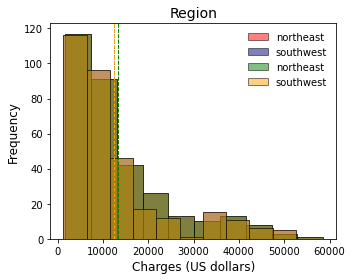

northeast: mean: 13406 , southeast: mean: 12347 , northwest: mean: 13406 , southwest: mean: 12347
ANOVA: statistic = 0.9329, p-value = 4.24e-01, not significant


In [23]:
##### regions
dataframe = [northeast, southeast, northwest, southwest]
colors = ['red', 'navy', 'green', 'orange']
legend = ['northeast', 'southwest', 'northeast', 'southwest']

fig, axs = plt.subplots(figsize=(5,4))

### region
for i in range(4):
    histogram(dataframe[i]['charges'], 1, legend[i], 'Charges (US dollars)', 'Frequency', colors[i])
axs.set_title('Region', size=14)
    
plt.tight_layout()
plt.show()
#fig.savefig('region.png')

print("northeast: mean:", "{:.0f}".format(dataframe[0]['charges'].mean()), ",", "southeast: mean:", "{:.0f}".format(dataframe[1]['charges'].mean()), ",", "northwest: mean:", "{:.0f}".format(dataframe[2]['charges'].mean()), ",", "southwest: mean:", "{:.0f}".format(dataframe[3]['charges'].mean()))

##### ANOVA
col = ['charges']
for column in col:
    print(one_way_anova(0.05, northeast[column], southeast[column], northwest[column], southwest[column]))

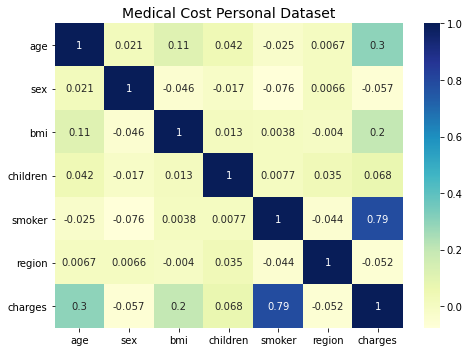

In [24]:
##### correlation analysis
corrMatrix_all = insurance_t.corr()
#print (corrMatrix_all)

fig, ax = plt.subplots(figsize=(7,5))
correlation_matrix(corrMatrix_all, title='Medical Cost Personal Dataset')
#fig.savefig('overallcorrmatrix.png')

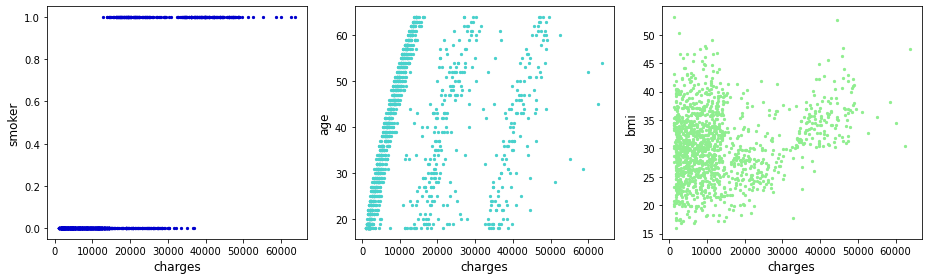

smoker: nonsmoker = 0, smoker = 1


In [25]:
##### scatter plot
fig, axs = plt.subplots(1,3,figsize=(13,4))

col1 = ['smoker', 'age', 'bmi']
colors = ['mediumblue', 'mediumturquoise', 'lightgreen']
for i in range(len(col1)):
    scatter_plot(insurance_t['charges'].values, insurance_t[col1[i]].values, i, 'charges', col1[i], colors[i])

plt.tight_layout()
plt.show()
#fig.savefig('scatterplots.png')
print('smoker: nonsmoker = 0, smoker = 1')

In [26]:
##### regression analysis
colname = ['smoker']
X = insurance_t[colname].values.reshape(-1,len(colname))
y = insurance_t['charges'].values
print(linear_regression(X,y))

(0.6197648148218988, array([23615.96353368]), 8434.268297856219, array([32050.23183153,  8434.26829786,  8434.26829786, ...,
        8434.26829786,  8434.26829786, 32050.23183153]))


r2: [0.6197648148218988, 0.7214008260577199, 0.7474771588119513, 0.749694530346479, 0.7497225098709179, 0.7501046229955982]


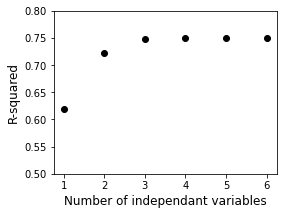

In [27]:
##### multivariate linear regression
colname = ['smoker', 'age', 'bmi', 'children', 'sex', 'region'] ### ranked by correlation strength from the correlation matrix
length = [num for num in range(1,7)]

r2=[]
for number in length:
    X = insurance_t[colname[:number]].values.reshape(-1,len(colname[:number]))
    y = insurance_t['charges'].values
    h = linear_regression(X,y)
    r2.append(h[0])
print('r2:',r2)

fig, ax = plt.subplots(1,figsize=(4,3))
ax.scatter(length, r2, color='black')
ax.set_xlabel('Number of independant variables', size=12)
ax.set_ylabel('R-squared', size=12)
ax.set_ylim(0.5,0.8)
plt.show()
#fig.savefig('regression_variables.png')